In [1]:
# Import Libraries
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the ticker
ticker = 'TSLA'

# Download TSLA stock data up to today
tsla_data = yf.download(ticker, start="2017-01-01")

# Print the retrieved data
print(tsla_data)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2017-01-03   14.466000   14.688667   14.064000   14.324000   88849500
2017-01-04   15.132667   15.200000   14.287333   14.316667  168202500
2017-01-05   15.116667   15.165333   14.796667   15.094667   88675500
2017-01-06   15.267333   15.354000   15.030000   15.128667   82918500
2017-01-09   15.418667   15.461333   15.200000   15.264667   59692500
...                ...         ...         ...         ...        ...
2025-02-14  355.839996  362.000000  347.500000  360.619995   68277300
2025-02-18  354.109985  359.100006  350.019989  355.010010   51631700
2025-02-19  360.559998  367.339996  353.670013  354.000000   67094400
2025-02-20  354.399994  362.299988  348.000000  361.510010   45965400
2025-02-21  337.799988  354.980011  334.420013  353.440002   73787800

[2046 rows x 5 colu

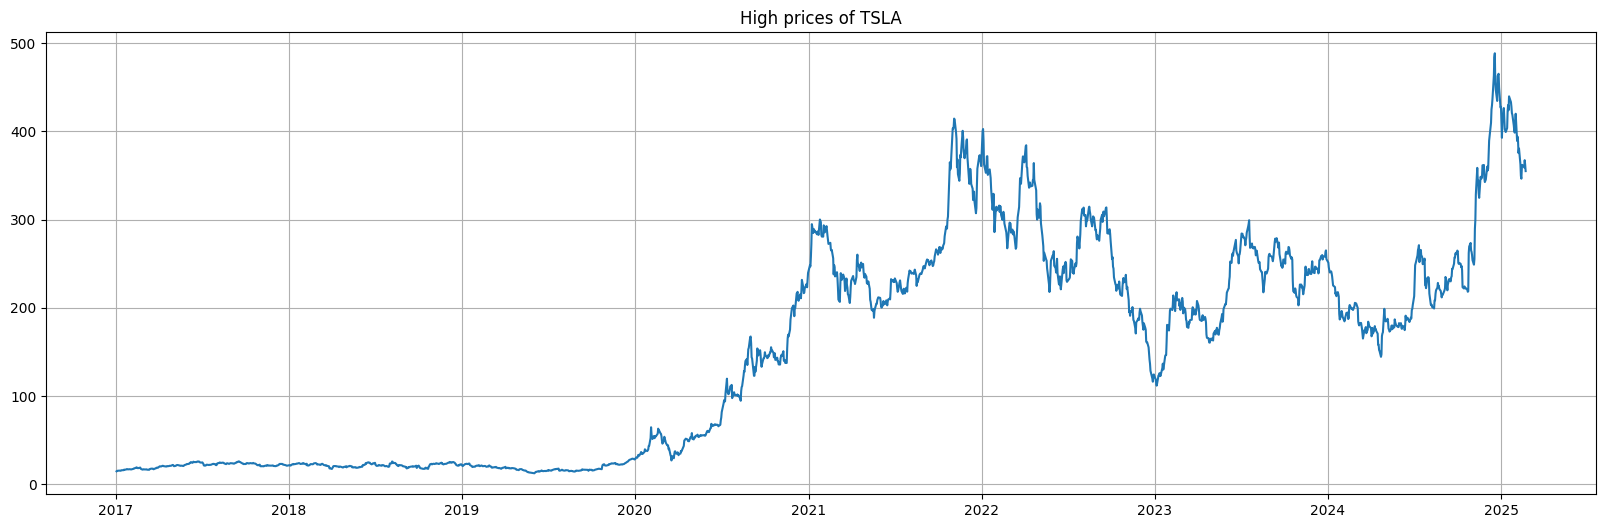

In [3]:
# Plot the High prices
plt.figure(figsize=(20, 6))
plt.plot(tsla_data['High'])
plt.title('High prices of TSLA')
plt.grid()

<Axes: xlabel='Date'>

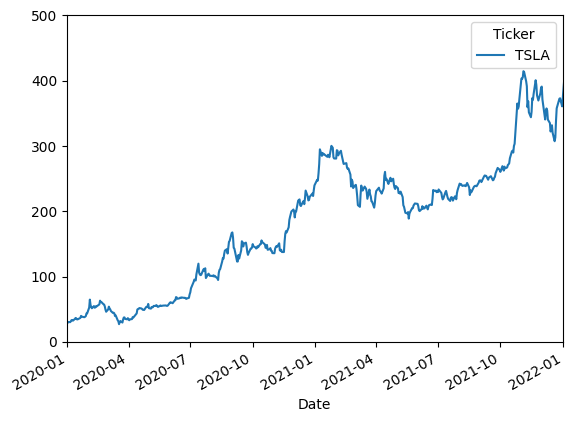

In [4]:
# Set an x limit and y limit to zoom in the plot
tsla_data['High'].plot(xlim=['2020-01-01', '2022-01-01'], ylim=[0, 500])


In [5]:
tsla_data

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2017-01-03,14.466000,14.688667,14.064000,14.324000,88849500
2017-01-04,15.132667,15.200000,14.287333,14.316667,168202500
2017-01-05,15.116667,15.165333,14.796667,15.094667,88675500
2017-01-06,15.267333,15.354000,15.030000,15.128667,82918500
2017-01-09,15.418667,15.461333,15.200000,15.264667,59692500
...,...,...,...,...,...
2025-02-14,355.839996,362.000000,347.500000,360.619995,68277300
2025-02-18,354.109985,359.100006,350.019989,355.010010,51631700


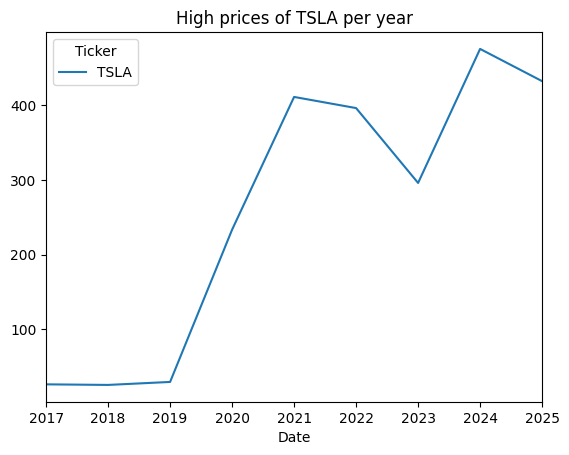

In [6]:
# Resample to year-end frequency and plot the maximum opening price per year
tsla_data.resample('YE').max().plot(y='Open', kind ='line', title='High prices of TSLA per year')

# Show the plot
plt.show()

### Simple Moving Average

In [7]:
# Add a column with the Rolling mean of the High prices
window = [10, 20, 30]
min_periods = 1
for i in window:
    tsla_data[f'Rolling_mean_{i}'] = tsla_data['High'].rolling(window=i, min_periods=min_periods).mean()

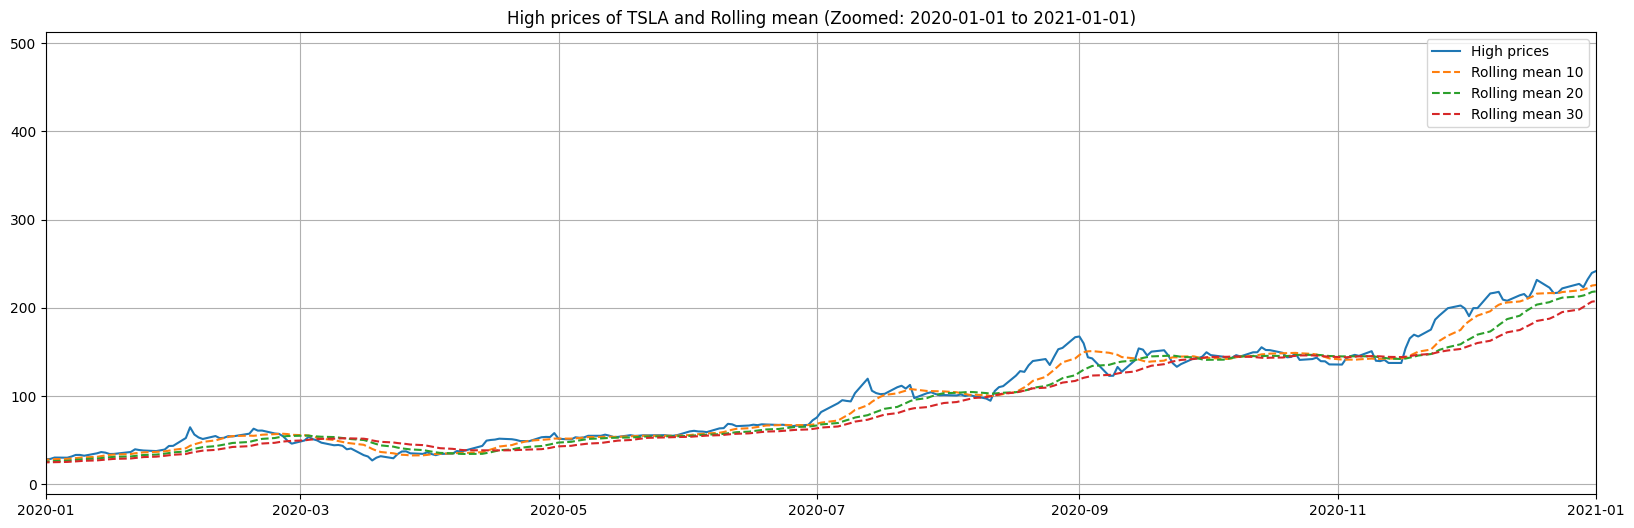

In [8]:
# Plot the High prices and the Rolling mean in the same plot by zooming in the data
plt.figure(figsize=(20, 6))
fig = plt.gcf()
plt.plot(tsla_data['High'], label='High prices')
for i in window:
    plt.plot(tsla_data[f'Rolling_mean_{i}'], label=f'Rolling mean {i}', linestyle='--')

# Set the x-axis limits to zoom in on the specified date range
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-01-01'))

plt.title('High prices of TSLA and Rolling mean (Zoomed: 2020-01-01 to 2021-01-01)')
plt.legend()
plt.grid()
plt.show()

### Cumilative Moving Average

In [9]:
# Add a column with the Cumulative Moving Average of the High prices
tsla_data['CMA'] = tsla_data['High'].expanding().mean()

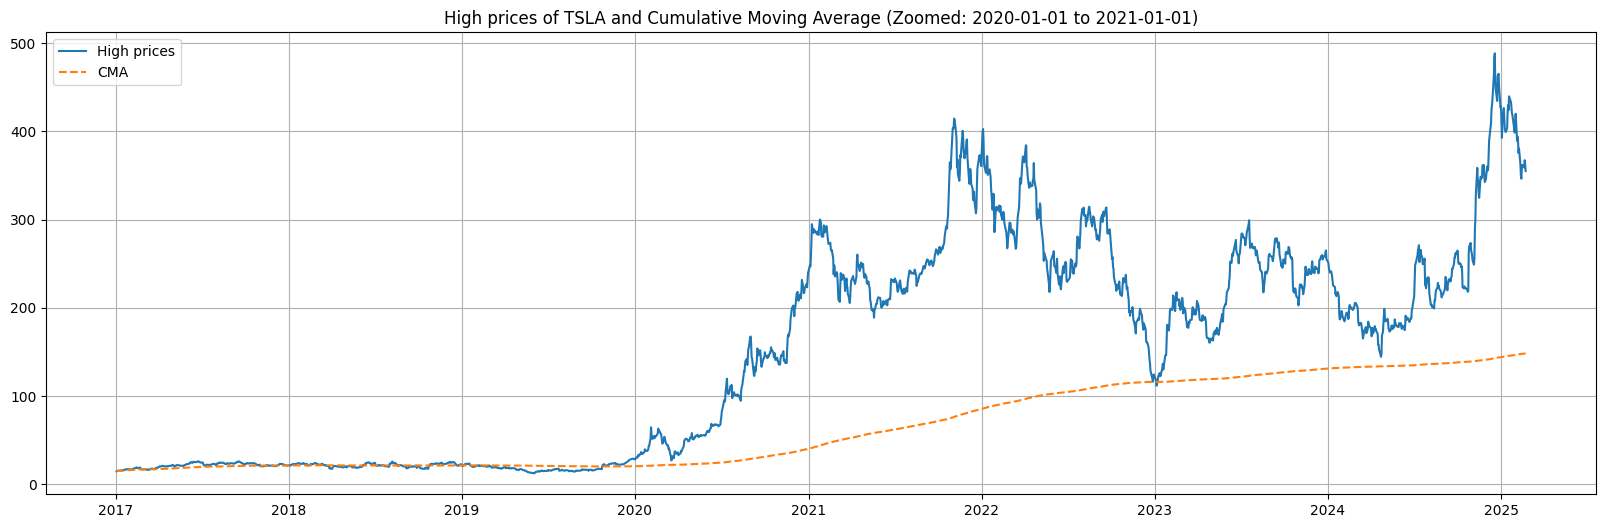

In [10]:
# Plot the High prices and the Cumulative Moving Average in the same plot by zooming in the data
plt.figure(figsize=(20, 6))
fig = plt.gcf()
plt.plot(tsla_data['High'], label='High prices')
plt.plot(tsla_data['CMA'], label='CMA', linestyle='--')

# Set the x-axis limits to zoom in on the specified date range
# plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-01-01'))

plt.title('High prices of TSLA and Cumulative Moving Average (Zoomed: 2020-01-01 to 2021-01-01)')
plt.legend()
plt.grid()
plt.show()

### Exponential Weighted Moving Average

In [11]:
# Add a column with the Exponential Moving Average of the High prices
alpha = [0.1, 0.5, 0.25]

for i in alpha:
    tsla_data[f'EMA_{i}'] = tsla_data['High'].ewm(alpha=i, adjust=True).mean()

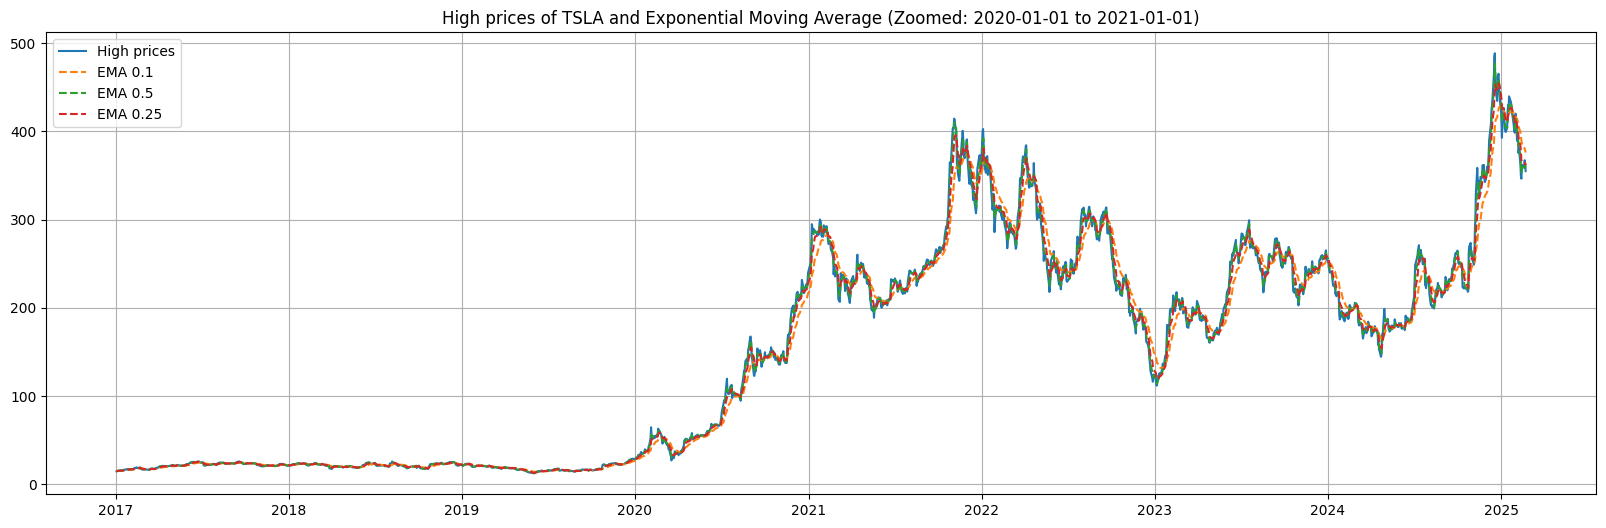

In [12]:
# Plot the High prices and the Exponential Moving Average in the same plot by zooming in the data
plt.figure(figsize=(20, 6))
fig = plt.gcf()
plt.plot(tsla_data['High'], label='High prices')
for i in alpha:
    plt.plot(tsla_data[f'EMA_{i}'], label=f'EMA {i}', linestyle='--')

# Set the x-axis limits to zoom in on the specified date range
# plt.xlim(pd.Timestamp('2021-01-01'), pd.Timestamp('2022-01-01'))

plt.title('High prices of TSLA and Exponential Moving Average (Zoomed: 2020-01-01 to 2021-01-01)')
plt.legend()
plt.grid()
plt.show()